Lab 8

Name: Wayne Lai

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

plt.rcParams["figure.figsize"] = (15,10)

In [2]:
# reading in the data
# signal data
higgsfile1 = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs_100000 = pickle.load(higgsfile1)

# background data
qcdfile1 = open ("qcd_100000_pt_250_500.pkl",'rb')
qcd_100000 = pickle.load(qcdfile1)

higgs_100000.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

mean of higgs: 114.892387
std of higgs: 10.718787

mean of qcd: 97.738041
std of qcd: 9.886255


C:\Users\Student User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
C:\Users\Student User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


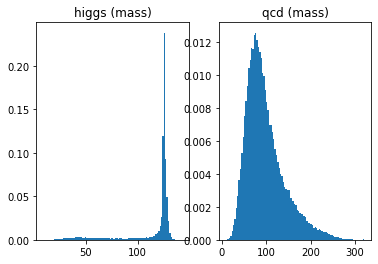

In [3]:
# finding the average and standard deviation of the data
lambda_higgs = np.mean(higgs_100000['mass'])
sigma_higgs = np.sqrt(lambda_higgs)
print('mean of higgs: %f' %lambda_higgs)
print('std of higgs: %f' %sigma_higgs)
print()

lambda_qcd = np.mean(qcd_100000['mass'])
sigma_qcd = np.sqrt(lambda_qcd)
print('mean of qcd: %f' %lambda_qcd)
print('std of qcd: %f' %sigma_qcd)

# make a histogram of the data
plt.subplot(1,2,1);
plt.hist(higgs_100000['mass'], bins = 100, normed = True);
plt.title('higgs (mass)');

plt.subplot(1,2,2);
plt.hist(qcd_100000['mass'], bins = 100, normed = True);
plt.title('qcd (mass)');

plt.show()

In [4]:
# for higgs
# finding the 5 sigma of the data, and the upper and lower bounds
sigma5_higgs = sigma_higgs * 5
upper_bound_higgs = sigma5_higgs + lambda_higgs
lower_bound_higgs = lambda_higgs - sigma5_higgs

print('upper bound is %f' %upper_bound_higgs)
print('lower bound is %f' %lower_bound_higgs)

upper bound is 168.486320
lower bound is 61.298454


In [5]:
# for qcd
# finding the 5 sigma of the data, and the upper and lower bounds
sigma5_qcd = sigma_qcd * 5
upper_bound_qcd = sigma5_qcd + lambda_qcd
lower_bound_qcd = lambda_qcd - sigma5_qcd

print('upper bound is %f' %upper_bound_qcd)
print('lower bound is %f' %lower_bound_qcd)

upper bound is 147.169317
lower bound is 48.306765


In [146]:
# for higgs
# counts the number of data that is within the threshold
count2 = 0;
for x in range(len(qcd_100000['mass'])):
    if higgs_100000['mass'][x] > upper_bound_higgs:
        count2 = count2 + 1
        
print(count2)

0


In [144]:
# for qcd
# counts the number of data that is outside the threshold
count1 = 0;
count2 = 0;
for x in range(len(qcd_100000['mass'])):
    if qcd_100000['mass'][x] > upper_bound_qcd:
        count1 = count1 + 1

for x in range(len(qcd_100000['mass'])):
    if qcd_100000['mass'][x] < lower_bound_qcd:
        count2 = count2 + 1

answer = int(count1 + count2)
print('N_qcd = %i' %answer)

N_qcd = 20610


C:\Users\Student User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
C:\Users\Student User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


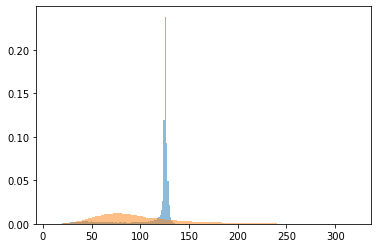

In [8]:
plt.hist(higgs_100000['mass'], bins = 100, normed = True, alpha = 0.5);

plt.hist(qcd_100000['mass'], bins = 100, normed = True, alpha = 0.5);

plt.show();

In [11]:
test = np.arange(10)
print(test)

[0 1 2 3 4 5 6 7 8 9]


In [41]:

from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats

In [134]:
data1 = np.array(qcd_100000['mass'][0:10000])
# data2 = np.array(qcd_100000['mass'][50000:99999])

In [135]:
test_statistic = lambda x: np.mean(x)
estimate, bias, stderr, conf_interval = jackknife_stats(data1, test_statistic, 0.95)

In [136]:
estimate

97.93438612827718

In [137]:
bias

1.4209433629730484e-10

In [138]:
stderr

0.4359615439308168

In [139]:
conf_interval

array([97.0799172 , 98.78885505])

In [92]:
numCuts = 4

In [108]:
# For problem 2, the data can be cut in half, and repeat the process that was done on one.
# Specifically, plot the histogram of the cut data, finding the values in terms of poisson
# distribution, ie lambda and sigma. Using cqd function to find the significance value at
# 95%. This can be repeated again with more cuts on the data.

# For problem 3, refer to lab 5 to compare to the mass data to see if there is comparably
# discrimitive.

array([0., 0.])

In [102]:
data = np.arange(12)
number_cuts = 4
start = 0
number_data = int(len(data) / 4)
print(number_data)

3


In [106]:
result = np.zeros(number_cuts,[])
for x in range(number_cuts):
    result[x,:] = data[start:(start + number_data)]
    start = start + number_data + 1

IndexError: too many indices for array